# Clustering sentences using K-means

Clustering text documents is a common problem in Natural Language Processing (NLP) where similar documents are grouped based on their content. K-Means clustering is a popular clustering technique used for this purpose.

IMPORT LIBRARIES

In [ ]:
import json
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

LOAD THE DATASET(sarcasm headlines)

In [ ]:
url = "https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

CONVERT TEXT TO NUMERIC REPRESENTATION USING TF-IDF

    1. TfidfVectorizer converts text into a numeric format.
    2. stop_words='english' removes common words like "the", "and" that don't add much meaning.
    3. fit_transform(sentence) creates a TF-IDF matrix where each row represents a document and each column represents a word’s importance.

In [ ]:
sentence = df["headline"]
vectorizer = TfidfVectorizer(stop_words = "english")

vectorized_documents = vectorizer.fit_transform(sentence)

REDUCE DIMENSIONALITY USING PCA

Since TF-IDF produces a high-dimensional matrix we reduce its dimensions to make it easier to visualize.

    1. TF-IDF output is high-dimensional and difficult to visualize.
    2. PCA(n_components=2) reduces it to 2 dimensions so we can plot it.

In [ ]:
pca = PCA(n_components = 2)

reduced_data = pca.fit_transform(vectorized_documents.toarray())

APPLY K-MEANS CLUSTERING

We will now apply the K-Means algorithm to group the headlines into categories (sarcastic or not sarcastic).

    1. KMeans(n_clusters=2): We choose 2 clusters since the dataset has headlines labeled as either sarcastic or not sarcastic.

    2. n_init=5: Runs K-Means 5 times to get the best clustering result.

    3. max_iter=500: The algorithm can iterate 500 times to find the best solution.
    
    4. random_state=42: Ensures that results are reproducible.

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters = num_clusters, n_init =5, max_iter = 500, random_state = 42)

kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

STORING CLUSTERING RESULTS

In [ ]:
results = pd.DataFrame()
results["documents"] = sentence
results["cluster"] = kmeans.labels_

print(results.sample(5))

                                               documents  cluster
15266  2014: year in review for the white house initi...        1
1210   wedding invitation includes depressing map to ...        0
10433  david brooks urges republicans: don't settle f...        0
19534  report: only 893,000 news stories to go until ...        1
9463   watch: jay carney's most epic clashes with rep...        0


VISUALIZATION

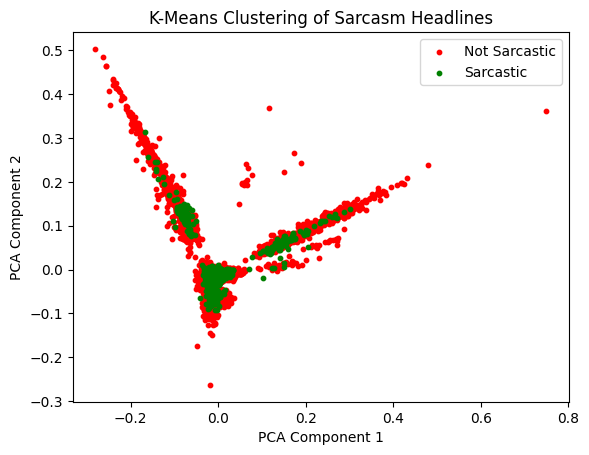

In [13]:
colors = ['red', 'green']
cluster_labels = ['Not Sarcastic', 'Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f'{cluster_labels[i]}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Sarcasm Headlines')
plt.show()

Each cluster is shown in different colors red for non-sarcastic and green for sarcastic.

The scatter plot shows how K-Means has grouped the headlines.